In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e2/sample_submission.csv
/kaggle/input/playground-series-s4e2/train.csv
/kaggle/input/playground-series-s4e2/test.csv


In [2]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
plt.rcParams['figure.figsize']=(8,4)
sns.set_style("darkgrid")

In [4]:
train=pd.read_csv("/kaggle/input/playground-series-s4e2/train.csv")
test=pd.read_csv("/kaggle/input/playground-series-s4e2/test.csv")
submission=pd.read_csv("/kaggle/input/playground-series-s4e2/sample_submission.csv")

In [79]:
final_submission=test.copy(deep=True)

In [6]:
train

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,20753,Male,25.137087,1.766626,114.187096,yes,yes,2.919584,3.000000,Sometimes,no,2.151809,no,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II
20754,20754,Male,18.000000,1.710000,50.000000,no,yes,3.000000,4.000000,Frequently,no,1.000000,no,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
20755,20755,Male,20.101026,1.819557,105.580491,yes,yes,2.407817,3.000000,Sometimes,no,2.000000,no,1.158040,1.198439,no,Public_Transportation,Obesity_Type_II
20756,20756,Male,33.852953,1.700000,83.520113,yes,yes,2.671238,1.971472,Sometimes,no,2.144838,no,0.000000,0.973834,no,Automobile,Overweight_Level_II


In [7]:
train.drop(['id'],axis=1,inplace=True)

In [8]:
train.isna().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [9]:
train.duplicated().sum()

0

In [10]:
train.select_dtypes(exclude='O').corr()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
Age,1.000000,-0.011713,0.283381,0.034414,-0.048479,-0.016325,-0.192259,-0.296154
Height,-0.011713,1.000000,0.416677,-0.071546,0.191383,0.183706,0.295278,0.076433
Weight,0.283381,0.416677,1.000000,0.245682,0.095947,0.317914,-0.084845,-0.086471
FCVC,0.034414,-0.071546,0.245682,1.000000,0.113349,0.101299,-0.089822,-0.147843
NCP,-0.048479,0.191383,0.095947,0.113349,1.000000,0.080949,0.100871,0.067459
CH2O,-0.016325,0.183706,0.317914,0.101299,0.080949,1.000000,0.082932,-0.010654
FAF,-0.192259,0.295278,-0.084845,-0.089822,0.100871,0.082932,1.000000,0.021213
TUE,-0.296154,0.076433,-0.086471,-0.147843,0.067459,-0.010654,0.021213,1.000000


<Axes: >

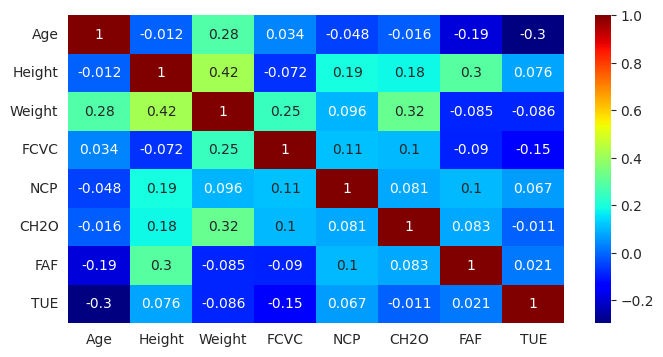

In [11]:
sns.heatmap(train.select_dtypes(exclude='O').corr(),annot=True,cmap='jet')

In [12]:
def count_plot(df):
    fig = plt.figure(figsize=(20, 20))
    X=df.select_dtypes('O')
    #print("columns={}\n".format(X.columns))
    n=len(list(X.columns))
    pn = 1
    for col in X:
        #print("n={}\npn={}\n".format(n,pn))
        if pn <= n:
            plt.subplot(3, int(np.round(n / 3)), pn)
            g = sns.countplot(data=X,x=col,hue='NObeyesdad')
            plt.xlabel(col, fontsize=15,color='red')
        pn += 1
    plt.show()

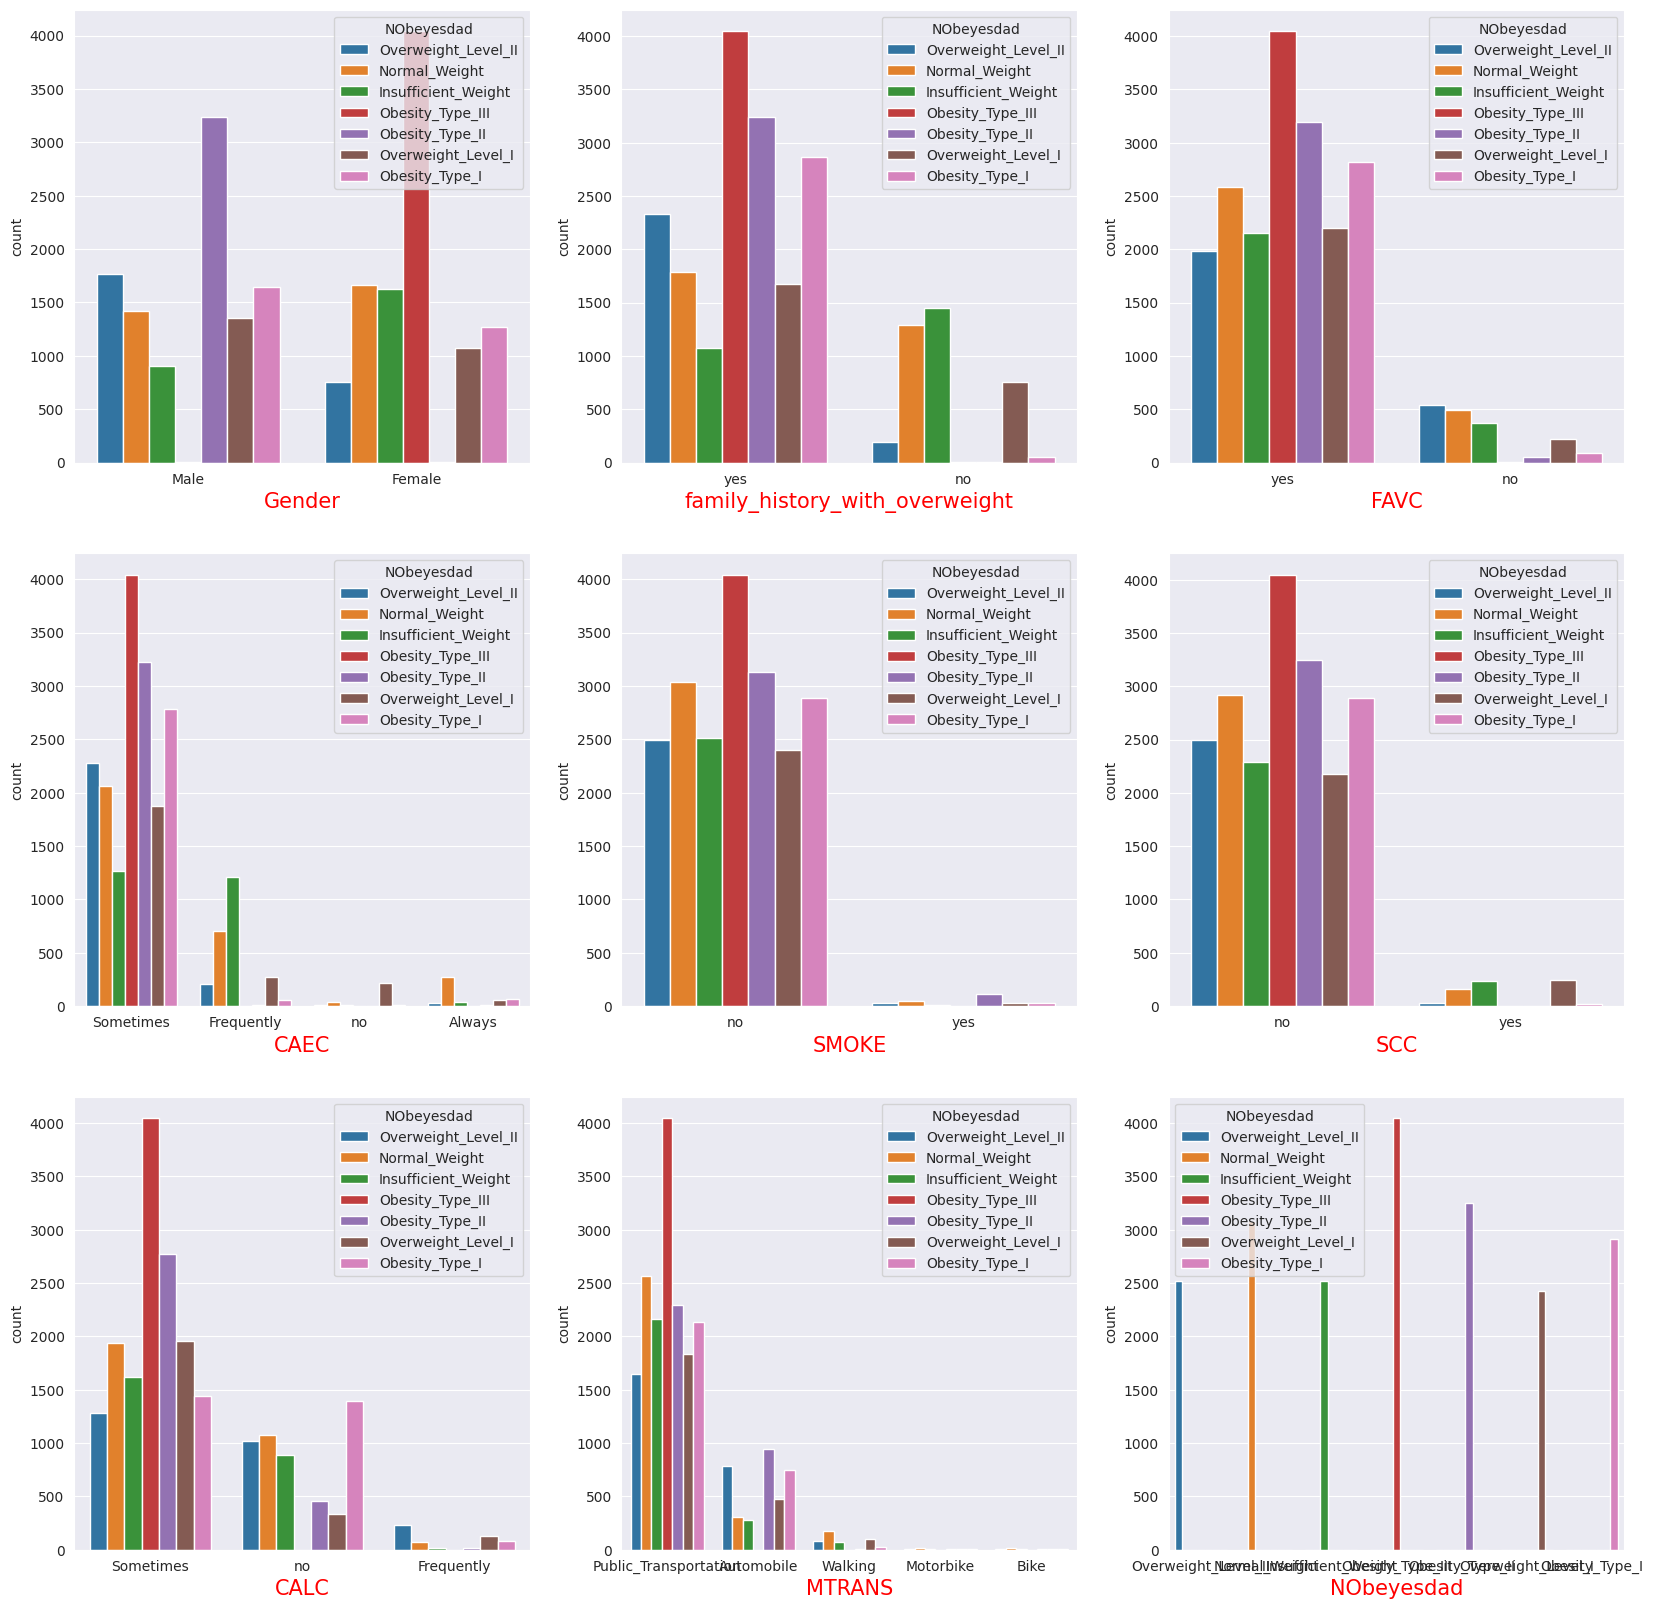

In [13]:
count_plot(train)

In [14]:
cat_col=['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS']

In [15]:
X=train.drop(['NObeyesdad'],axis=1)
y=train['NObeyesdad']

In [16]:
X=pd.get_dummies(data=X,columns=cat_col,drop_first=True).astype("float")

In [17]:
X

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Male,family_history_with_overweight_yes,...,CAEC_Sometimes,CAEC_no,SMOKE_yes,SCC_yes,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,24.443011,1.699998,81.669950,2.000000,2.983297,2.763573,0.000000,0.976473,1.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,18.000000,1.560000,57.000000,2.000000,3.000000,2.000000,1.000000,1.000000,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,18.000000,1.711460,50.165754,1.880534,1.411685,1.910378,0.866045,1.673584,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,20.952737,1.710730,131.274851,3.000000,3.000000,1.674061,1.467863,0.780199,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,31.641081,1.914186,93.798055,2.679664,1.971472,1.979848,1.967973,0.931721,1.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,25.137087,1.766626,114.187096,2.919584,3.000000,2.151809,1.330519,0.196680,1.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
20754,18.000000,1.710000,50.000000,3.000000,4.000000,1.000000,2.000000,1.000000,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
20755,20.101026,1.819557,105.580491,2.407817,3.000000,2.000000,1.158040,1.198439,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
20756,33.852953,1.700000,83.520113,2.671238,1.971472,2.144838,0.000000,0.973834,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [18]:
def dist_plot(df):
    fig = plt.figure(figsize=(20, 20))
    X=df.select_dtypes(exclude='O')
    #print("columns={}\n".format(X.columns))
    n=len(list(X.columns))
    pn = 1
    for col in X:
        #print("n={}\npn={}\n".format(n,pn))
        if pn <= n:
            plt.subplot(3, int(np.round(n / 3)), pn)
            g = sns.distplot(X[col],kde=True)
            plt.xlabel(col, fontsize=15,color='red')
        pn += 1
    plt.show()
    
def box_plot(df):
    fig = plt.figure(figsize=(20, 20))
    X=df.select_dtypes(exclude='O')
    #print("columns={}\n".format(X.columns))
    n=len(list(X.columns))
    pn = 1
    for col in X:
        #print("n={}\npn={}\n".format(n,pn))
        if pn <= n:
            plt.subplot(3, int(np.round(n / 3)), pn)
            g = sns.boxplot(data=X,x=col)
            plt.xlabel(col, fontsize=15,color='red')
        pn += 1
    plt.show()

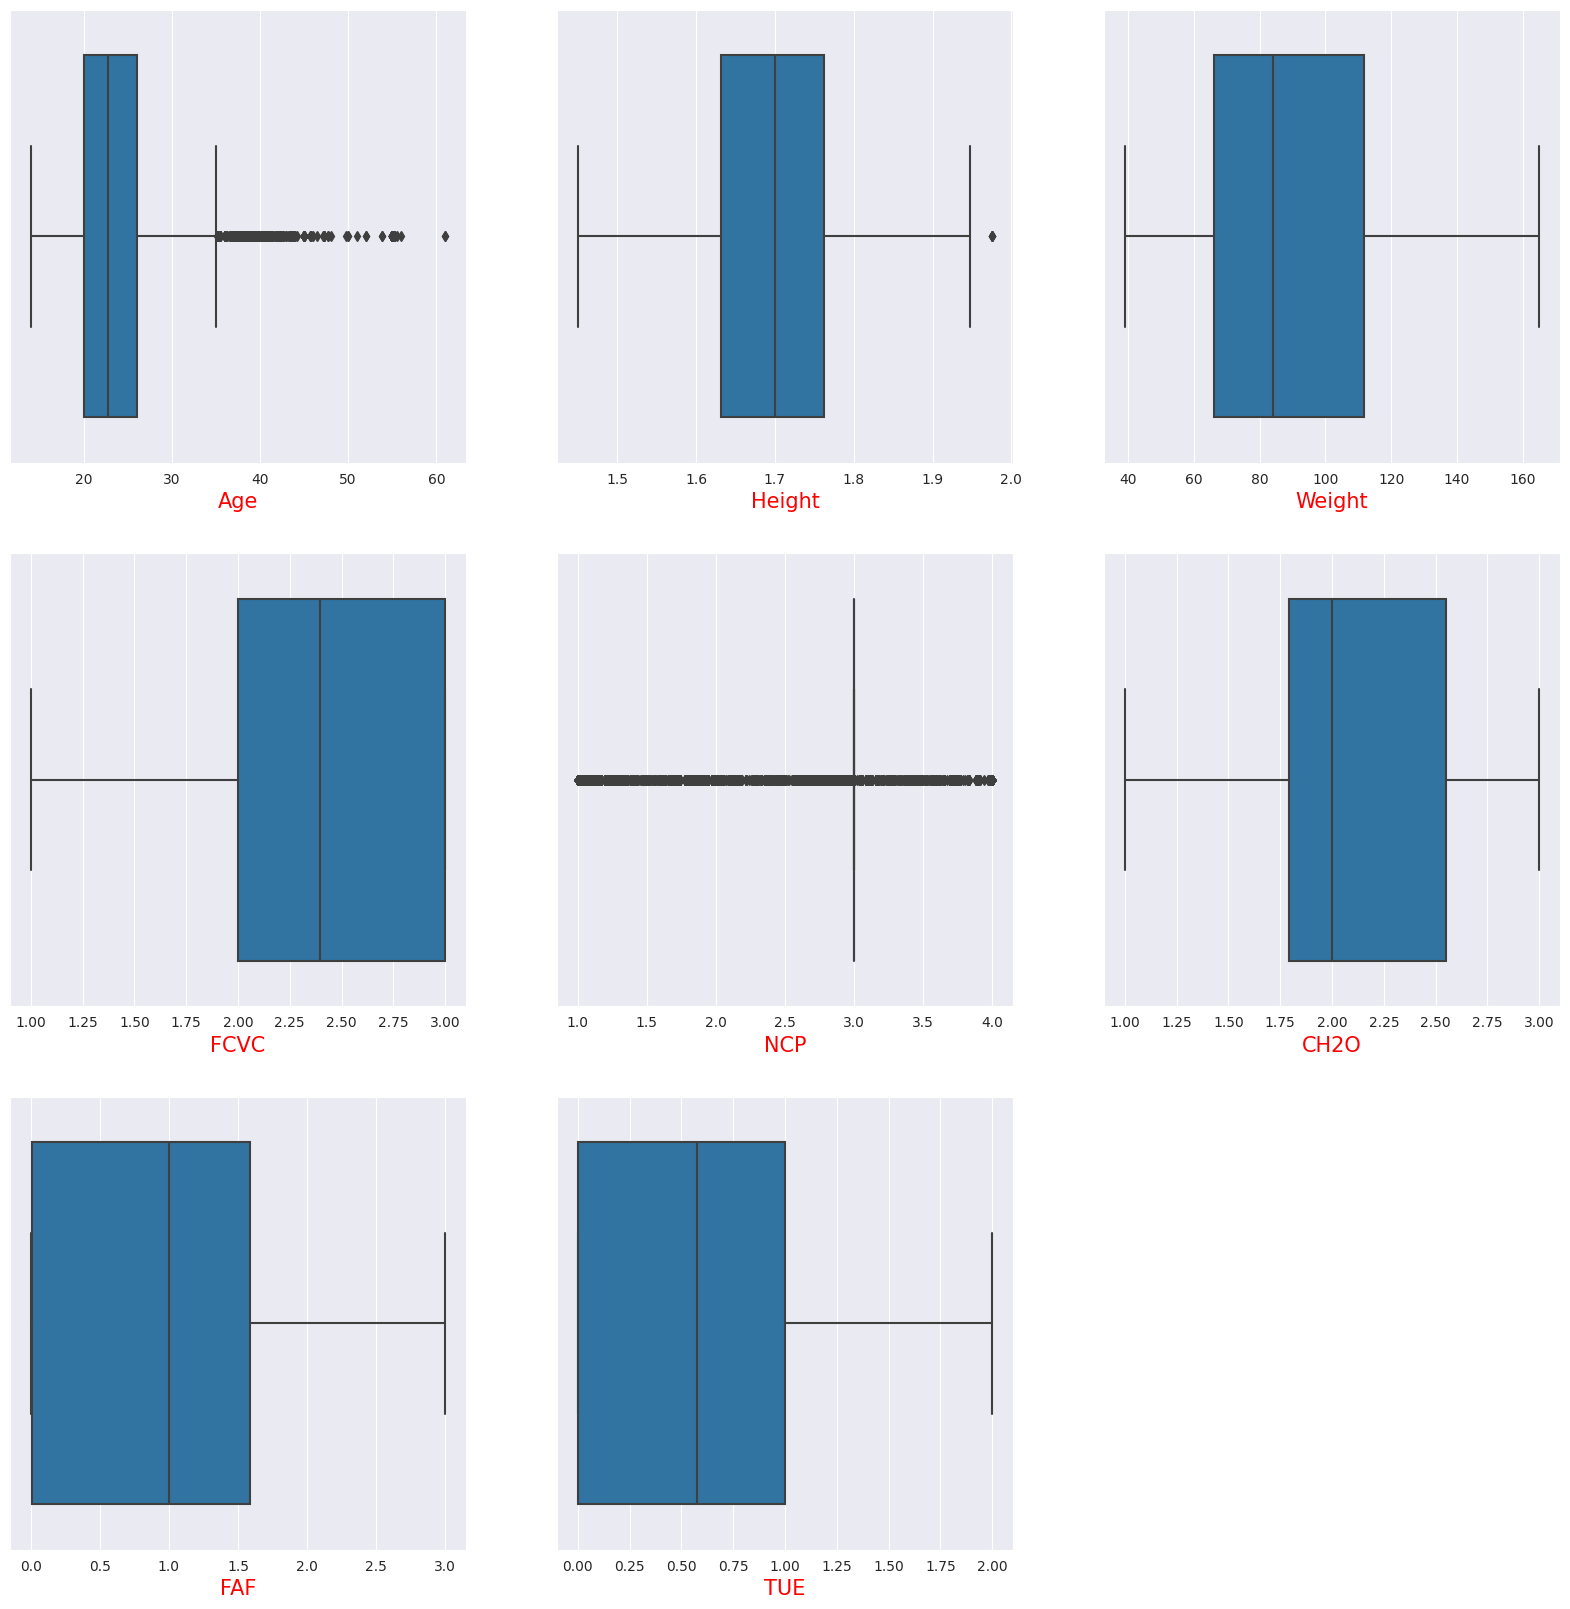

In [19]:
box_plot(train)

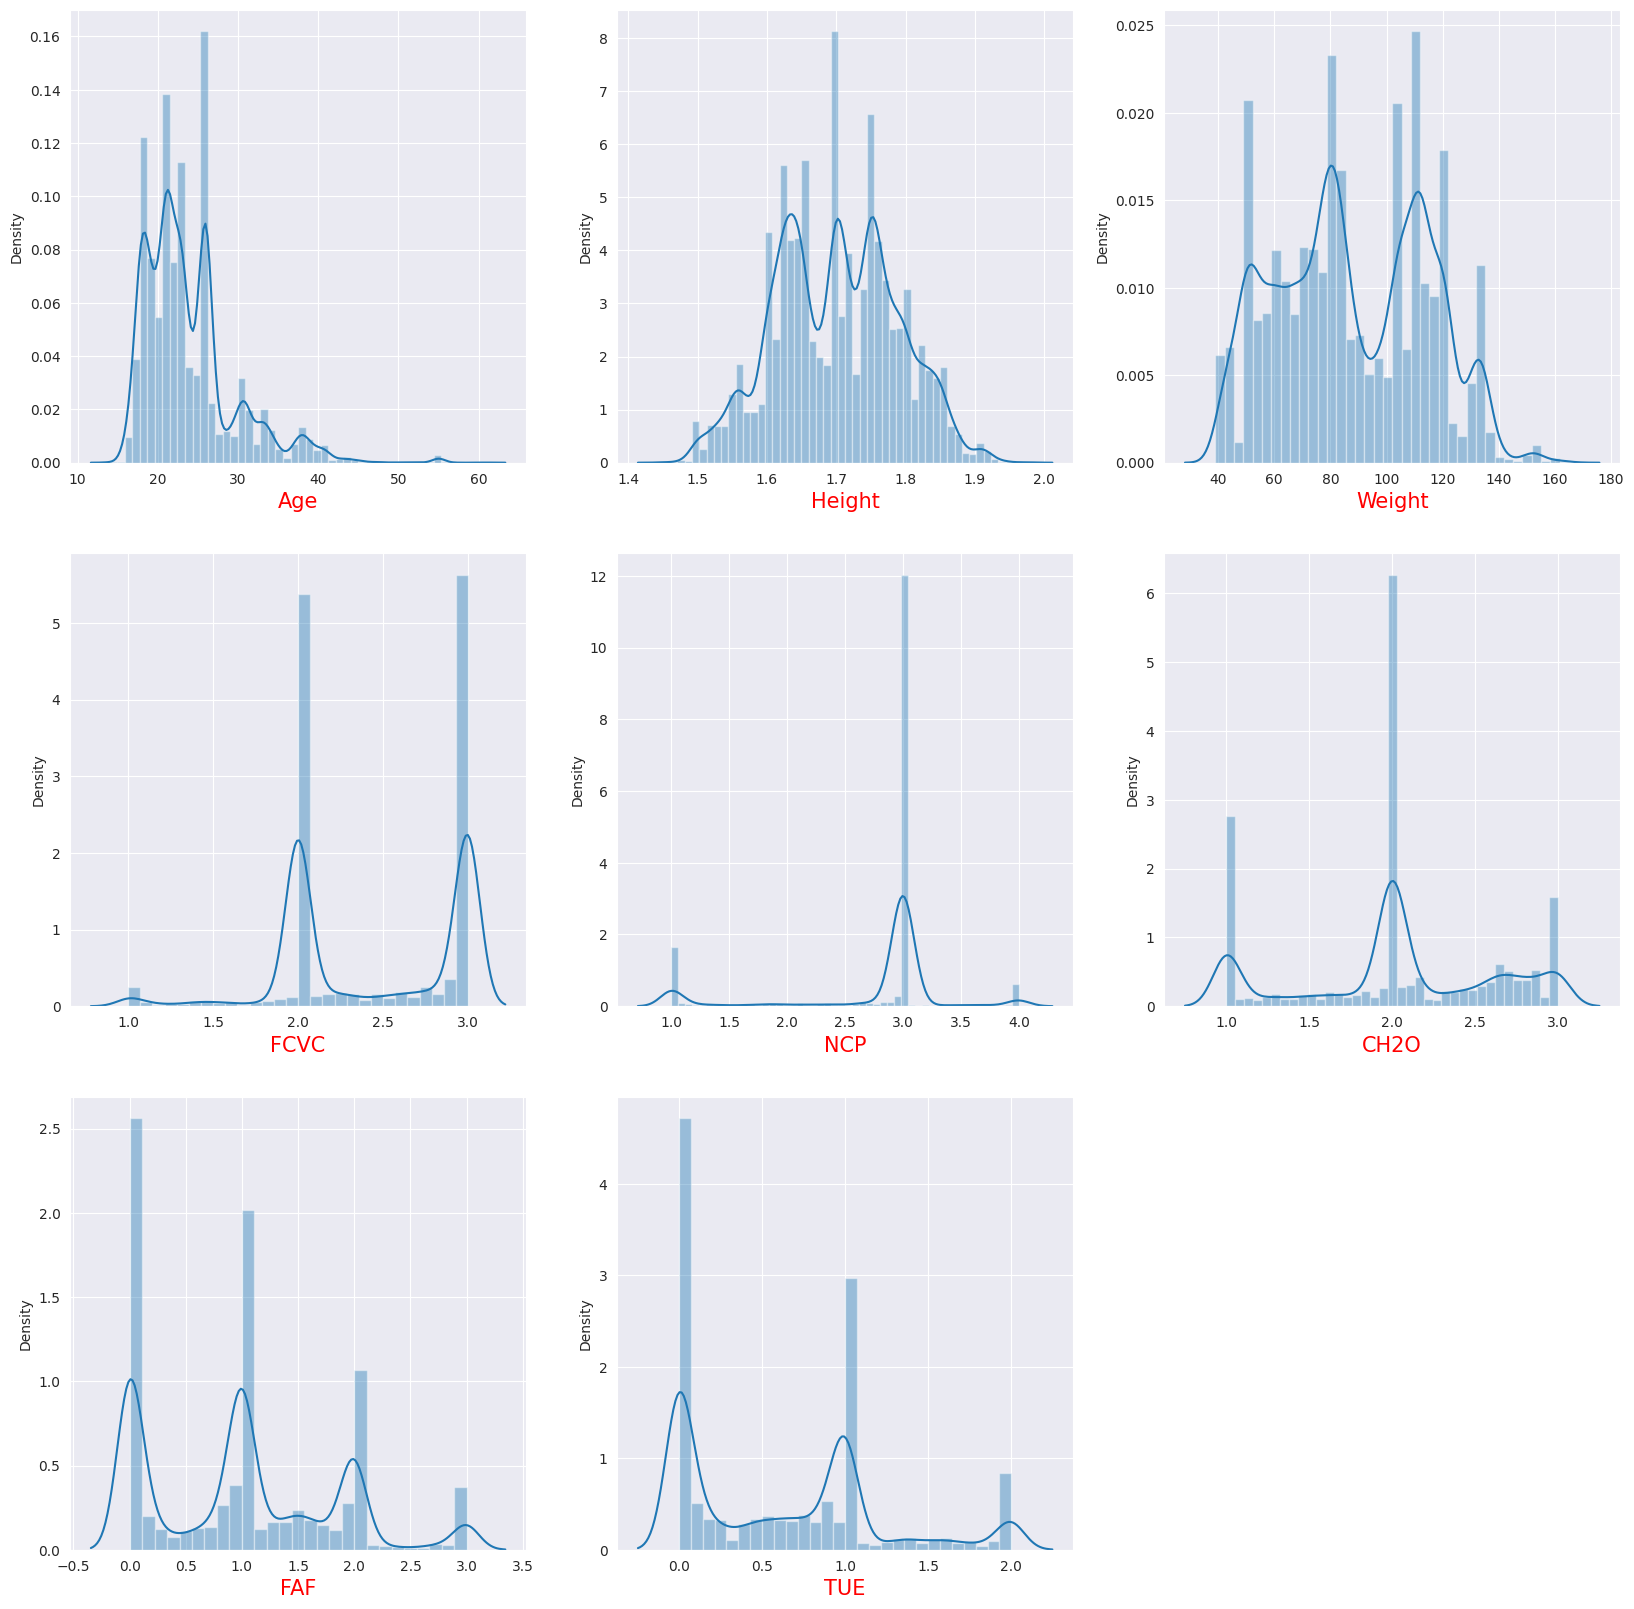

In [20]:
dist_plot(train)

In [21]:
X

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Male,family_history_with_overweight_yes,...,CAEC_Sometimes,CAEC_no,SMOKE_yes,SCC_yes,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,24.443011,1.699998,81.669950,2.000000,2.983297,2.763573,0.000000,0.976473,1.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,18.000000,1.560000,57.000000,2.000000,3.000000,2.000000,1.000000,1.000000,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,18.000000,1.711460,50.165754,1.880534,1.411685,1.910378,0.866045,1.673584,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,20.952737,1.710730,131.274851,3.000000,3.000000,1.674061,1.467863,0.780199,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,31.641081,1.914186,93.798055,2.679664,1.971472,1.979848,1.967973,0.931721,1.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,25.137087,1.766626,114.187096,2.919584,3.000000,2.151809,1.330519,0.196680,1.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
20754,18.000000,1.710000,50.000000,3.000000,4.000000,1.000000,2.000000,1.000000,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
20755,20.101026,1.819557,105.580491,2.407817,3.000000,2.000000,1.158040,1.198439,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
20756,33.852953,1.700000,83.520113,2.671238,1.971472,2.144838,0.000000,0.973834,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [22]:
y.value_counts()

NObeyesdad
Obesity_Type_III       4046
Obesity_Type_II        3248
Normal_Weight          3082
Obesity_Type_I         2910
Insufficient_Weight    2523
Overweight_Level_II    2522
Overweight_Level_I     2427
Name: count, dtype: int64

In [23]:
print(y.unique())

['Overweight_Level_II' 'Normal_Weight' 'Insufficient_Weight'
 'Obesity_Type_III' 'Obesity_Type_II' 'Overweight_Level_I'
 'Obesity_Type_I']


In [25]:
y.value_counts()

NObeyesdad
Obesity_Type_III       4046
Obesity_Type_II        3248
Normal_Weight          3082
Obesity_Type_I         2910
Insufficient_Weight    2523
Overweight_Level_II    2522
Overweight_Level_I     2427
Name: count, dtype: int64

In [86]:
# Define the mapping dictionary
label_mapping = {
    'Obesity_Type_III': 6,
    'Obesity_Type_II': 5,
    'Normal_Weight': 1,
    'Obesity_Type_I': 4,
    'Insufficient_Weight': 0,
    'Overweight_Level_II': 3,
    'Overweight_Level_I': 2
}
reverse_label_mapping = {
    6:'Obesity_Type_III',
    5:'Obesity_Type_II',
    1:'Normal_Weight',
    4:'Obesity_Type_I',
    0:'Insufficient_Weight',
    3:'Overweight_Level_II',
    2:'Overweight_Level_I'
}

# Apply label encoding using the mapping dictionary
y_encoded = [label_mapping[label] for label in y]
y_encoded = pd.DataFrame(y_encoded,columns=['Encoded_Label'])
# Display the encoded labels
y_encoded


,Encoded_Label
0,3
1,1
2,0
3,6
4,3
...,...
20753,5
20754,0
20755,5
20756,3


In [27]:
from sklearn.preprocessing import StandardScaler

# Instantiate the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the feature matrix X and transform it
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns = X.columns )

X_scaled

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Male,family_history_with_overweight_yes,...,CAEC_Sometimes,CAEC_no,SMOKE_yes,SCC_yes,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0.105699,-0.002828,-0.235713,-0.836279,0.314684,1.206594,-1.171141,0.597438,1.004152,0.469099,...,0.429196,-0.116721,-0.109287,-0.185009,0.614658,-0.575385,-0.039293,-0.042825,0.493925,-0.151707
1,-1.027052,-1.606291,-1.170931,-0.836279,0.338364,-0.048349,0.021775,0.636513,-0.995866,0.469099,...,-2.329939,-0.116721,-0.109287,-0.185009,-1.626921,1.737967,-0.039293,-0.042825,-2.024597,-0.151707
2,-1.027052,0.128451,-1.430012,-1.060332,-1.913423,-0.195644,-0.138022,1.755239,-0.995866,0.469099,...,0.429196,-0.116721,-0.109287,-0.185009,-1.626921,1.737967,-0.039293,-0.042825,0.493925,-0.151707
3,-0.507929,0.120090,1.644770,1.039171,0.338364,-0.584035,0.579896,0.271455,-0.995866,0.469099,...,0.429196,-0.116721,-0.109287,-0.185009,0.614658,-0.575385,-0.039293,-0.042825,0.493925,-0.151707
4,1.371197,2.450367,0.224054,0.438397,-1.119801,-0.081469,1.176486,0.523111,1.004152,0.469099,...,0.429196,-0.116721,-0.109287,-0.185009,0.614658,-0.575385,-0.039293,-0.042825,0.493925,-0.151707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,0.227725,0.760293,0.996987,0.888355,0.338364,0.201151,0.416056,-0.697686,1.004152,0.469099,...,0.429196,-0.116721,-0.109287,-0.185009,0.614658,-0.575385,-0.039293,-0.042825,0.493925,-0.151707
20754,-1.027052,0.111729,-1.436296,1.039171,1.756085,-1.691863,1.214691,0.636513,1.004152,-2.131745,...,-2.329939,-0.116721,-0.109287,-0.185009,0.614658,-0.575385,-0.039293,-0.042825,0.493925,-0.151707
20755,-0.657669,1.366537,0.670717,-0.071439,0.338364,-0.048349,0.210303,0.966092,1.004152,0.469099,...,0.429196,-0.116721,-0.109287,-0.185009,-1.626921,1.737967,-0.039293,-0.042825,0.493925,-0.151707
20756,1.760067,-0.002805,-0.165574,0.422594,-1.119801,0.189694,-1.171141,0.593055,1.004152,0.469099,...,0.429196,-0.116721,-0.109287,-0.185009,-1.626921,1.737967,-0.039293,-0.042825,-2.024597,-0.151707


In [28]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

2024-02-27 05:08:19.299977: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-27 05:08:19.300105: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-27 05:08:19.465210: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y_encoded,test_size=0.2)

In [30]:
from keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [31]:
y_train_one_hot

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [32]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
# Define the architecture of the ANN
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(7, activation='softmax')
])

In [34]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train_one_hot, epochs=10, batch_size=32, validation_data=(X_test, y_test_one_hot))

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test_one_hot)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/10
519/519 [==============================] - 2s 2ms/step - loss: 0.7848 - accuracy: 0.7124 - val_loss: 0.5047 - val_accuracy: 0.8124
Epoch 2/10
519/519 [==============================] - 1s 2ms/step - loss: 0.4479 - accuracy: 0.8369 - val_loss: 0.4201 - val_accuracy: 0.8459
Epoch 3/10
519/519 [==============================] - 1s 2ms/step - loss: 0.3942 - accuracy: 0.8581 - val_loss: 0.3934 - val_accuracy: 0.8596
Epoch 4/10
519/519 [==============================] - 1s 2ms/step - loss: 0.3702 - accuracy: 0.8708 - val_loss: 0.3906 - val_accuracy: 0.8603
Epoch 5/10
519/519 [==============================] - 1s 2ms/step - loss: 0.3602 - accuracy: 0.8732 - val_loss: 0.3793 - val_accuracy: 0.8668
Epoch 6/10
519/519 [==============================] - 1s 2ms/step - loss: 0.3521 - accuracy: 0.8740 - val_loss: 0.3833 - val_accuracy: 0.8639
Epoch 7/10
519/519 [==============================] - 1s 2ms/step - loss: 0.3466 - accuracy: 0.8779 - val_loss: 0.3976 - val_accuracy: 0.8560
Epoch 

In [35]:
test

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13835,34593,Male,23.327836,1.721384,78.030383,yes,no,2.813234,3.000000,Sometimes,no,1.000000,no,0.807076,0.778632,Sometimes,Public_Transportation
13836,34594,Female,29.000000,1.590000,62.000000,no,yes,3.000000,3.000000,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation
13837,34595,Female,22.935612,1.585547,44.376637,no,yes,3.000000,2.273740,Frequently,no,2.000000,no,1.949840,1.000000,Sometimes,Public_Transportation
13838,34596,Male,21.000000,1.620000,53.000000,yes,yes,2.000000,3.000000,Sometimes,no,2.000000,no,3.000000,2.000000,no,Public_Transportation


In [36]:
submission

,id,NObeyesdad
0,20758,Normal_Weight
1,20759,Normal_Weight
2,20760,Normal_Weight
3,20761,Normal_Weight
4,20762,Normal_Weight
...,...,...
13835,34593,Normal_Weight
13836,34594,Normal_Weight
13837,34595,Normal_Weight
13838,34596,Normal_Weight


In [38]:
X_train

array([[-0.67558946, -0.34659094, -0.30316668, ..., -0.04394013,
        -2.00611772, -0.15282714],
       [-0.85062914,  0.56816658, -0.49278192, ..., -0.04394013,
         0.49847523, -0.15282714],
       [-0.85062914, -1.03265907, -1.30812745, ..., -0.04394013,
         0.49847523, -0.15282714],
       ...,
       [-1.02566883, -0.89090596, -0.22732058, ..., -0.04394013,
         0.49847523, -0.15282714],
       [-0.49763275,  1.28006518,  0.64633023, ..., -0.04394013,
         0.49847523, -0.15282714],
       [-0.85062914, -1.71872721, -1.02370459, ..., -0.04394013,
         0.49847523, -0.15282714]])

In [40]:
y_pred=model.predict(X_test)

130/130 [==============================] - 0s 2ms/step


In [41]:
y_train

,Encoded_Label
3466,3
13441,1
10670,1
13042,0
8703,4
...,...
7717,1
15122,1
9848,4
18864,4


In [47]:
y_pred[0]

array([5.2156286e-19, 4.9110886e-16, 2.0324350e-08, 4.6291443e-06,
       3.0764199e-03, 9.4291419e-01, 5.4004647e-02], dtype=float32)

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
model=RandomForestClassifier()

In [50]:
model.fit(X_train,y_train)

RandomForestClassifier()

In [51]:
y_pred=model.predict(X_test)

In [55]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score

In [57]:
accuracy_score(y_test,y_pred)

0.8892100192678227

In [59]:
confusion_matrix(y_test,y_pred)

array([[478,  43,   4,   0,   0,   0,   0],
       [ 31, 566,  28,   6,   0,   0,   0],
       [  4,  80, 315,  56,  14,   0,   0],
       [  0,  16,  43, 407,  34,   4,   0],
       [  0,   3,  12,  40, 492,  15,   2],
       [  0,   0,   0,   7,  14, 620,   0],
       [  0,   0,   2,   0,   1,   1, 814]])

In [60]:
test

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13835,34593,Male,23.327836,1.721384,78.030383,yes,no,2.813234,3.000000,Sometimes,no,1.000000,no,0.807076,0.778632,Sometimes,Public_Transportation
13836,34594,Female,29.000000,1.590000,62.000000,no,yes,3.000000,3.000000,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation
13837,34595,Female,22.935612,1.585547,44.376637,no,yes,3.000000,2.273740,Frequently,no,2.000000,no,1.949840,1.000000,Sometimes,Public_Transportation
13838,34596,Male,21.000000,1.620000,53.000000,yes,yes,2.000000,3.000000,Sometimes,no,2.000000,no,3.000000,2.000000,no,Public_Transportation


In [61]:
test.drop(['id'],axis=1,inplace=True)

In [62]:
test_encoded=pd.get_dummies(data=test,columns=cat_col,drop_first=True).astype("float")

In [64]:
test_encoded

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Male,family_history_with_overweight_yes,...,CAEC_no,SMOKE_yes,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,26.899886,1.848294,120.644178,2.938616,3.000000,2.825629,0.855400,0.000000,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,21.000000,1.600000,66.000000,2.000000,1.000000,3.000000,1.000000,0.000000,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,26.000000,1.643355,111.600553,3.000000,3.000000,2.621877,0.000000,0.250502,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,20.979254,1.553127,103.669116,2.000000,2.977909,2.786417,0.094851,0.000000,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,26.000000,1.627396,104.835346,3.000000,3.000000,2.653531,0.000000,0.741069,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13835,23.327836,1.721384,78.030383,2.813234,3.000000,1.000000,0.807076,0.778632,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
13836,29.000000,1.590000,62.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
13837,22.935612,1.585547,44.376637,3.000000,2.273740,2.000000,1.949840,1.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
13838,21.000000,1.620000,53.000000,2.000000,3.000000,2.000000,3.000000,2.000000,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [68]:
X.columns

Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE',
       'Gender_Male', 'family_history_with_overweight_yes', 'FAVC_yes',
       'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no', 'SMOKE_yes', 'SCC_yes',
       'CALC_Sometimes', 'CALC_no', 'MTRANS_Bike', 'MTRANS_Motorbike',
       'MTRANS_Public_Transportation', 'MTRANS_Walking'],
      dtype='object')

In [69]:
test_encoded.columns

Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE',
       'Gender_Male', 'family_history_with_overweight_yes', 'FAVC_yes',
       'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no', 'SMOKE_yes', 'SCC_yes',
       'CALC_Frequently', 'CALC_Sometimes', 'CALC_no', 'MTRANS_Bike',
       'MTRANS_Motorbike', 'MTRANS_Public_Transportation', 'MTRANS_Walking'],
      dtype='object')

In [72]:
test_encoded.drop('CALC_Frequently',axis=1,inplace=True)

In [73]:
test_encoded=pd.DataFrame(scaler.transform(test_encoded),columns=test_encoded.columns)

In [76]:
final_prediction=model.predict(test_encoded)

In [83]:
final_prediction=pd.DataFrame({'NObeyesdad':final_prediction})

In [88]:
final_prediction['NObeyesdad']=final_prediction['NObeyesdad'].map(reverse_label_mapping)

In [90]:
final_submission=pd.concat([final_submission,final_prediction],axis=1)

In [92]:
final_submission=final_submission[['id','NObeyesdad']]

In [99]:
final_submission.to_csv("OBESITY_PREDICTION_SUBMISSION.csv",index=False)

In [100]:
os.listdir()

['OBESITY_PREDICTION_SUBMISSION.xlsx',
 'OBESITY_PREDICTION_SUBMISSION.csv',
 '.virtual_documents']